In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import unicodeit

Data Manager

In [3]:
data = pd.read_excel(r'C:\Users\Mehdi\Desktop\1.xlsx')

Scaling the data

In [4]:
scaler=RobustScaler()
std_data = scaler.fit(data.loc[:,'Pb':])
std_data = scaler.transform(data.loc[:,'Pb':])
std_data = pd.DataFrame(std_data, columns = data.columns[6:27])
std_data = pd.concat([data.loc[:,'form':'h'], std_data], axis=1)

Pearson

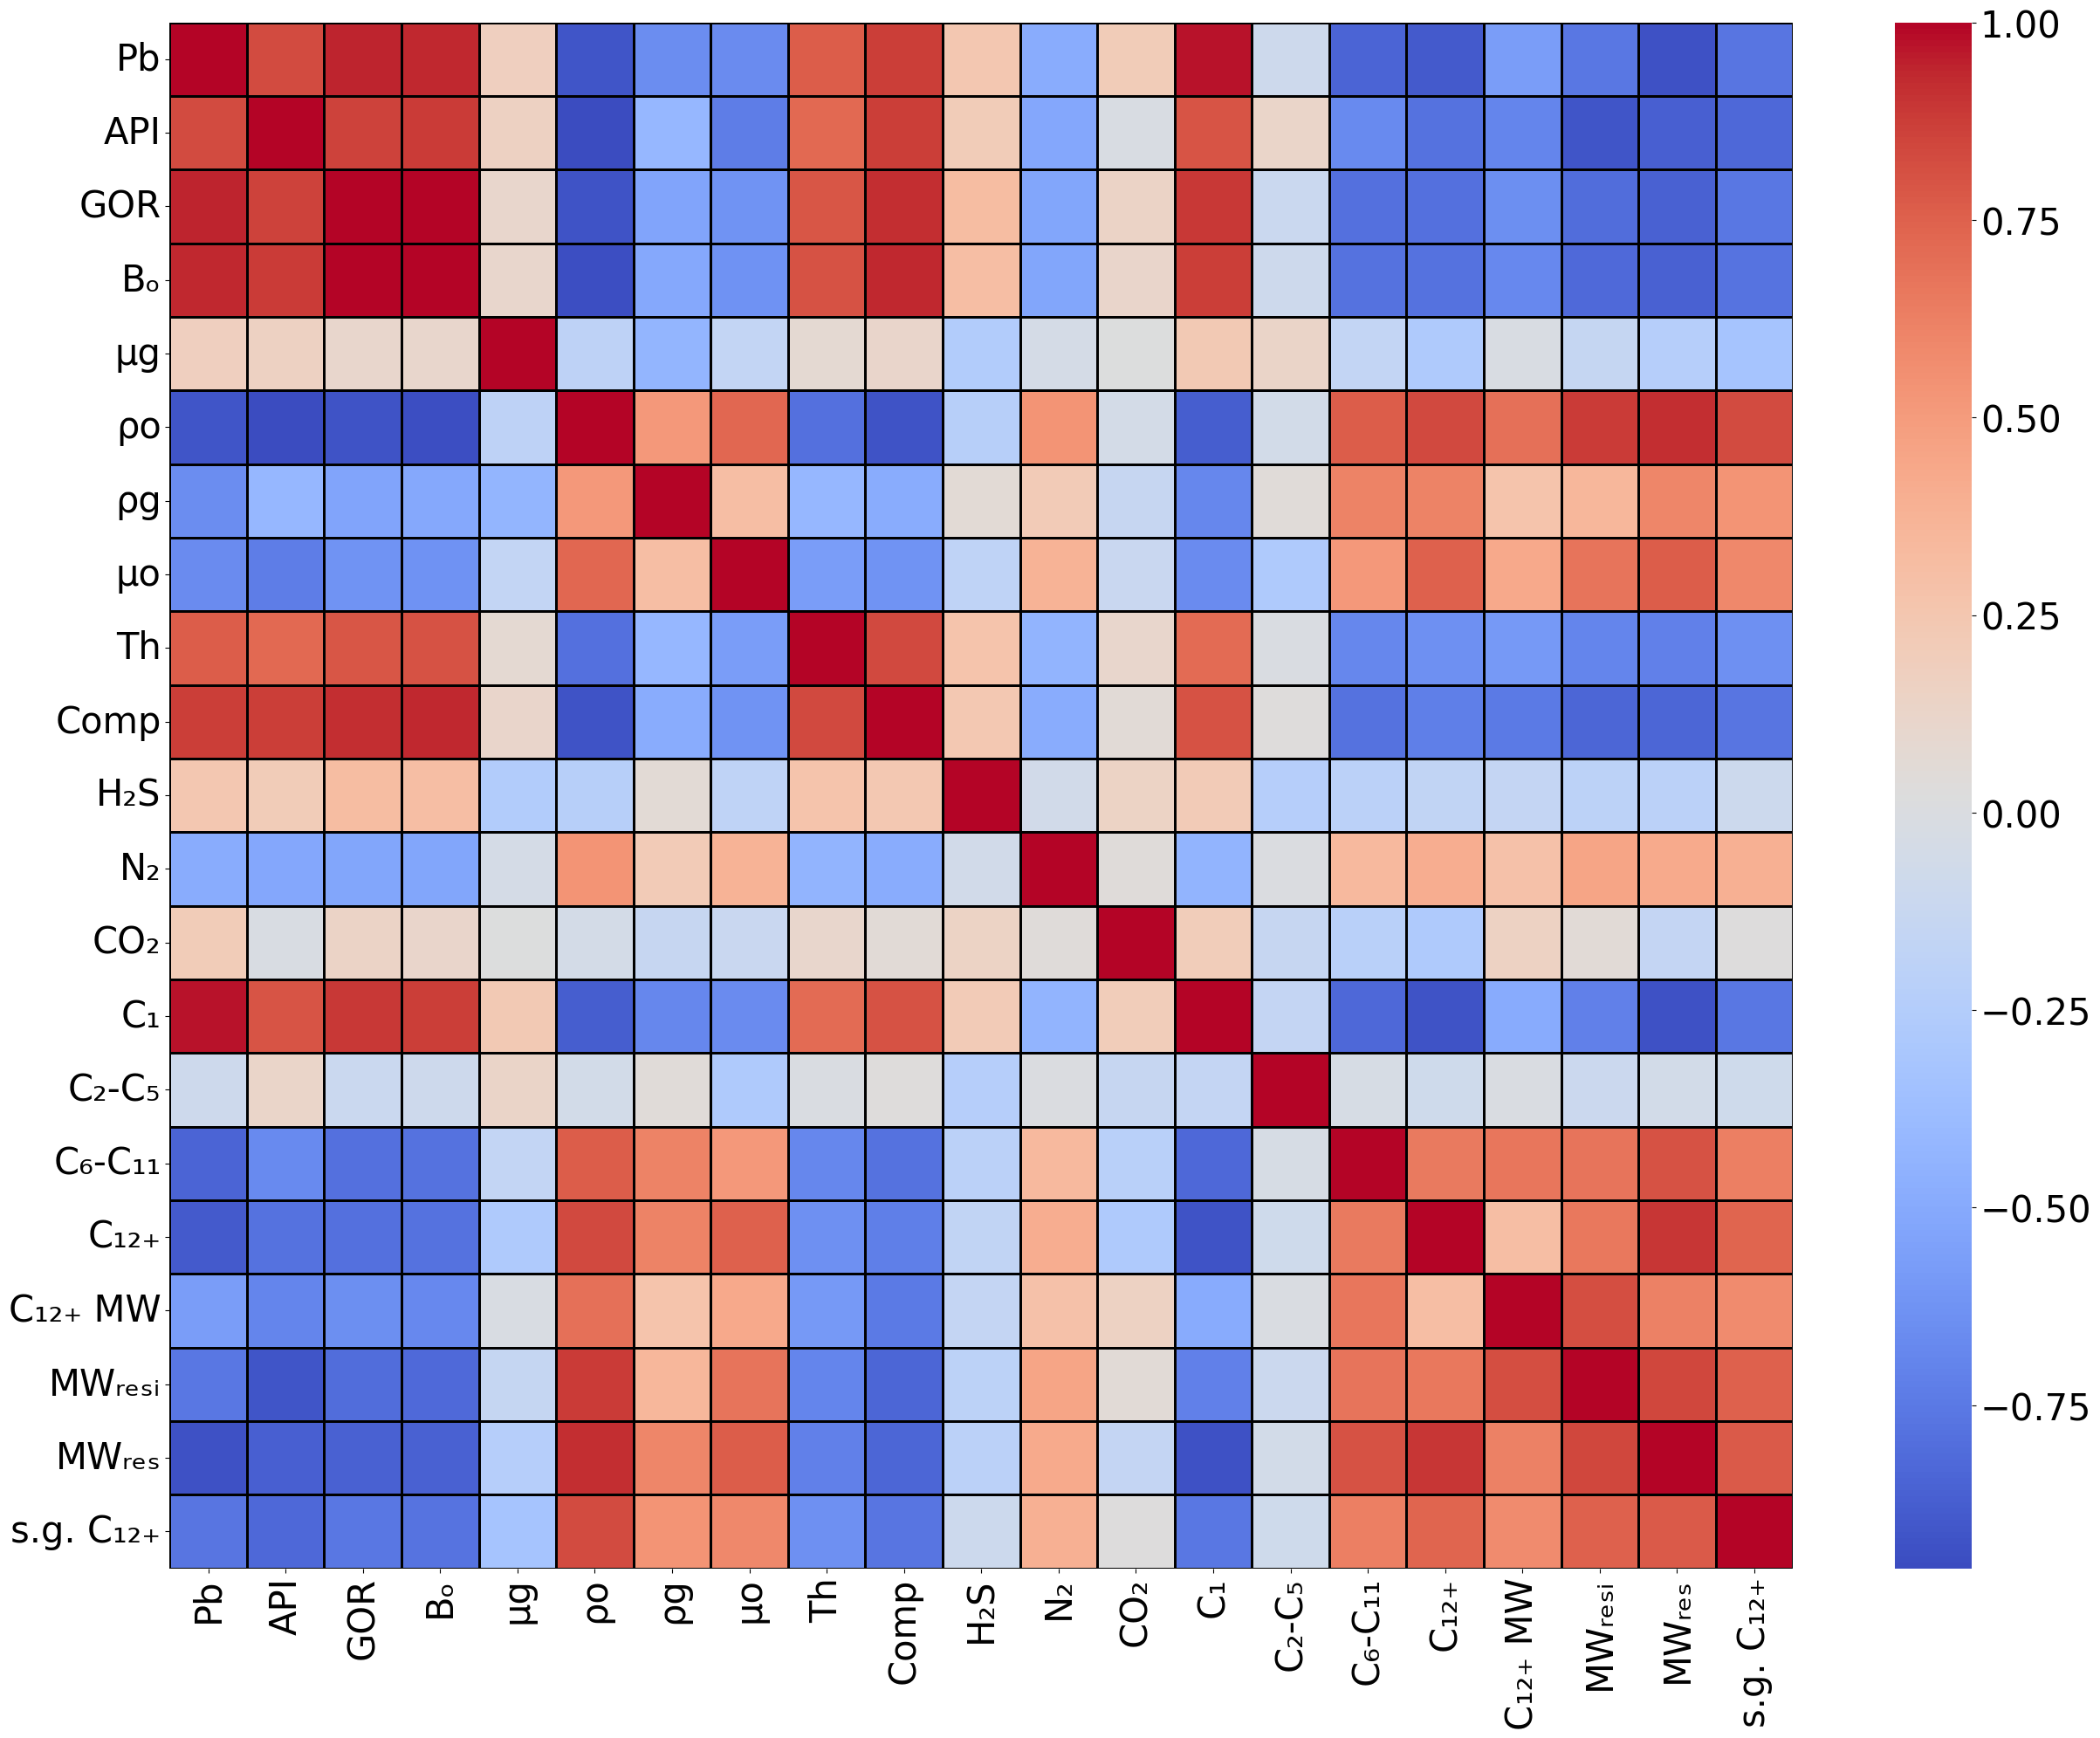

In [5]:
pearson = std_data.loc[:,'Pb':].corr()

fig=plt.figure(figsize=(30,23))
plt.rc('xtick', labelsize = 30)
plt.rc('ytick', labelsize = 30)


a = ['Pb', 'API', 'GOR', 'Bₒ', 'μg', 'ρo','ρg', 'μo', 'Th', 'Comp', 'H₂S', 'N₂', 'CO₂', 'C₁', 'C₂-C₅', 'C₆-C₁₁', 'C₁₂₊', 'C₁₂₊ MW', 'MWᵣₑₛᵢ', 'MWᵣₑₛ', 's.g. C₁₂₊' ]
sns.heatmap(std_data.loc[:,'Pb':].corr(), cmap='coolwarm', annot=False, linewidths=2, linecolor='black', xticklabels = a, yticklabels = a)

plt.savefig('plot.png') 
plt.show()


Dropping some data based on what we learned from pearson

In [6]:
std_data.drop(labels=['GOR','Bo', 'API', 'Comp','C12+' ,'MW_Res'],axis= 1,inplace=True)
data.drop(labels=['GOR','Bo', 'API', 'Comp','C12+' ,'MW_Res'],axis= 1,inplace=True)

Separation of Data based on Formation

In [7]:
FAH_S = std_data[(std_data.form == "FAH")]
ILM_S = std_data[(std_data.form == "ILM")]
SAR_S = std_data[(std_data.form == "SAR")]
GAD_S = std_data[(std_data.form == "GAD")]
KZH_S = std_data[(std_data.form == "KZH")]
ASM_S = std_data[(std_data.form == "ASM")]

FAH = data[(data.form == "FAH")]
ILM = data[(data.form == "ILM")]
SAR = data[(data.form == "SAR")]
GAD = data[(data.form == "GAD")]
KZH = data[(data.form == "KZH")]
ASM = data[(data.form == "ASM")]



#sns.pairplot(FAH)
#plt.show()

In [8]:
pearson = SAR.corr()
print(pearson['x':'y'])

          x         y        Pb       Mug     Rho_o     Rho_g      Mu_o  \
x  1.000000 -0.672854  0.079540 -0.243601 -0.190351  0.242887  0.042896   
y -0.672854  1.000000  0.143134  0.193189  0.169129 -0.174710 -0.064735   

         Th       H2S        N2       CO2        C1     C2-C5    C6-C11  \
x  0.326335  0.090823 -0.192687  0.457011  0.025154 -0.172471 -0.121231   
y -0.346909  0.086218  0.119362 -0.127931  0.094050  0.043289  0.075909   

    MW_C12+   MW_Resi   SpGr12+  
x -0.003815 -0.050069  0.427625  
y  0.243471  0.314694 -0.147853  


C:\Users\Mehdi\AppData\Local\Temp\ipykernel_6260\925378031.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson = SAR.corr()


Plots based on location and depth

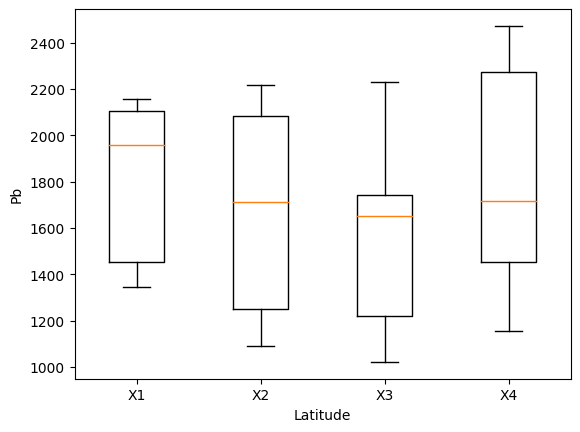

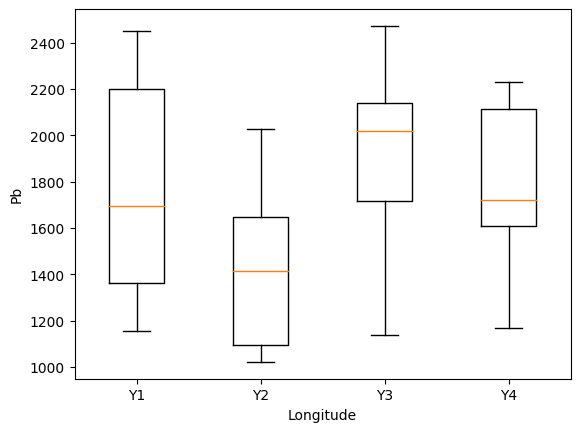

In [9]:
Dic = {'Pb':SAR.loc[:,'Pb'], 'X':SAR.loc[:,'x'], 'ind' : np.arange(SAR.loc[:,'Pb'].shape[0])}
Pb_X = pd.DataFrame(Dic)
Pb_X = Pb_X.sort_values(by=['X'])
X1 = Pb_X.iloc[0:14, 0]
X2 = Pb_X.iloc[14:28, 0]
X3 = Pb_X.iloc[28:42, 0]
X4 = Pb_X.iloc[42:55, 0]
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.boxplot([X1,X2,X3,X4], labels=['X1', 'X2', 'X3', 'X4'])
plt.xlabel('Latitude')
plt.ylabel('Pb')
plt.savefig('plot1.png') 
plt.show()

Dic2 = {'Pb':SAR.loc[:,'Pb'], 'Y':SAR.loc[:,'y'], 'ind' : np.arange(SAR.loc[:,'Pb'].shape[0])}
Pb_Y = pd.DataFrame(Dic2)
Pb_Y = Pb_Y.sort_values(by=['Y'])
Y1 = Pb_Y.iloc[0:14, 0]
Y2 = Pb_Y.iloc[14:28, 0]
Y3 = Pb_Y.iloc[28:42, 0]
Y4 = Pb_Y.iloc[42:55, 0]
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.boxplot([Y1,Y2,Y3,Y4], labels=['Y1', 'Y2', 'Y3', 'Y4'])
plt.xlabel('Longitude')
plt.ylabel('Pb')
plt.savefig('plot2.png') 
plt.show()

[ 0.29801735  0.45747283 -0.17636543 -0.01513035 -0.01516919  0.30059341
 -0.37082315 -0.03035256  0.31674582  0.34066178 -0.63400182  0.78154962
  0.47935103  0.42107536  0.46077505 -1.11015873 -0.76942872  0.13337064
 -0.19857434 -0.41456285 -0.78158295  0.14130435 -0.03555799  0.15247138
 -0.18967027  0.22849214 -0.55122549 -0.52514986 -0.60424503 -0.74488017
 -0.68624535 -0.74573185 -0.8935889  -0.78740157 -0.30426955 -0.1396348
  0.55512215  0.67096774]


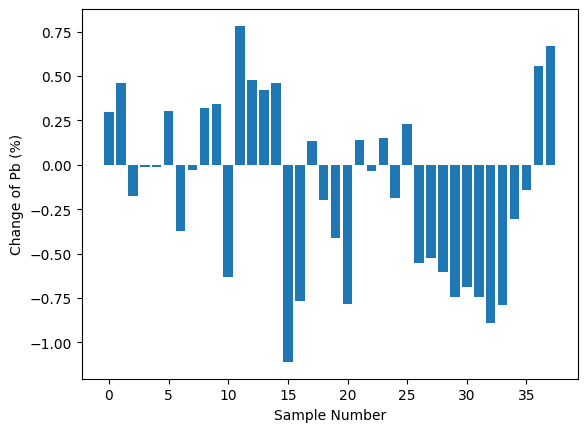

In [10]:
Pb_FAH_Depth_Corr = FAH.loc[0:142,'Pb']+FAH.loc[0:142,'h'].apply(lambda x: (4300 - x)*-0.13)
#Pb_FAH_Depth_Corr = pd.DataFrame(Pb_FAH_Depth_Corr)

Change_Percent = (Pb_FAH_Depth_Corr - FAH.loc[0:142,'Pb'])*100/FAH.loc[0:142,'Pb']
cpn = Change_Percent.to_numpy()
ind = np.arange(Change_Percent.shape[0])
print(cpn)
plt.bar(ind , cpn)
plt.xlabel('Sample Number')
plt.ylabel('Change of Pb (%)')
plt.savefig('plot3.png') 
plt.show()

Isolation Forest


4     -0.204625
6     -0.108549
18     0.118376
20     0.000707
34     0.079764
35    -0.004436
38     0.062375
39    -0.036011
40     0.029857
41     0.160446
42     0.048019
43     0.144599
44    -0.010854
46     0.098702
47     0.117561
48     0.061342
53     0.056817
60     0.067814
61     0.068560
65     0.103477
66     0.133701
71     0.116842
73     0.116973
74     0.109161
77     0.117391
78     0.117472
79     0.096933
80     0.069511
81     0.125941
82    -0.048906
83     0.090670
84     0.055602
85     0.025228
88     0.050887
89     0.088385
90    -0.026716
91     0.115867
92     0.046227
95     0.093686
96     0.079690
97     0.045176
98     0.078090
101    0.120433
102    0.103729
105    0.046476
106   -0.007908
107   -0.018880
113    0.007561
115    0.118377
117    0.077052
118   -0.014743
124    0.015251
126    0.045493
129    0.078573
131    0.072073
Name: Scores, dtype: float64


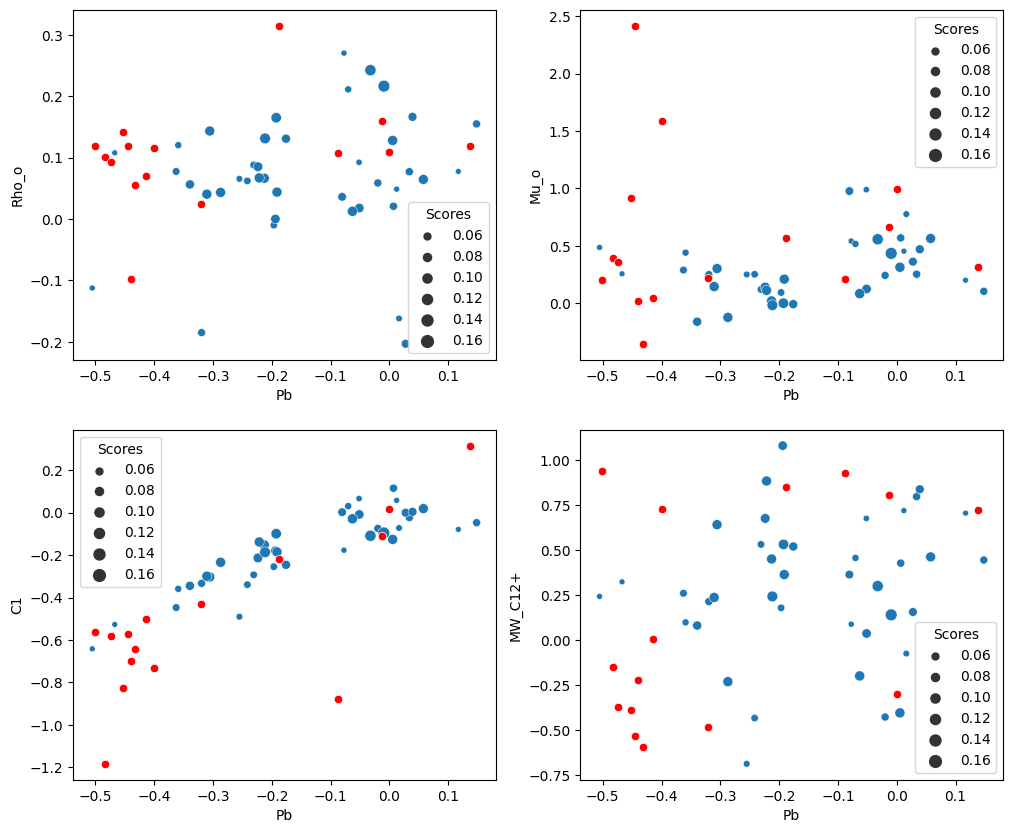

In [11]:
def IsolationForest(Data, n_est):
    from sklearn.ensemble import IsolationForest
    #Contamination is the percentage of outlier
    clf = IsolationForest(n_estimators = n_est)
    clf.fit(Data)
    Data['Scores'] = clf.decision_function(Data)
    print(Data['Scores'])    
    Data_Sorted = Data.sort_values(by=['Scores'])
    plt.figure(figsize = (12, 10))
    plt.title('Isolation Forest Method -- B Reservoir')
    ax1 = plt.subplot(2,2,1)
    sns.scatterplot(data=Data_Sorted[15:], x='Pb', y="Rho_o", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="Rho_o", c = 'red', legend=False)
    plt.xlabel('Pb')
    plt.ylabel('Rho_o')


    ax2 = plt.subplot(2,2,2)
    sns.scatterplot(data=Data_Sorted[15:], x='Pb', y="Mu_o", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="Mu_o", c = 'red', legend=False)
    plt.xlabel('Pb')
    plt.ylabel('Mu_o')

    ax3 = plt.subplot(2,2,3)
    sns.scatterplot(data=Data_Sorted[15:], x='Pb', y="C1", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="C1", c = 'red', legend=False)
    plt.xlabel('Pb')
    plt.ylabel('C1')
    
    ax4 = plt.subplot(2,2,4)
    sns.scatterplot(data=Data_Sorted[15:], x='Pb', y="MW_C12+", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="MW_C12+", c = 'red', legend=False)
    plt.xlabel('Pb')
    plt.ylabel('MW_C12+')
    
    plt.savefig('plot.png', dpi=300)
    plt.show()
       
    #plt.scatter(Data['Pb'], Data['Rho_o'], c='red', alpha=0.9)
    #sns.pairplot(FAH, hue = 'Scores', corner=True)
    #plt.show()
    
    return

#COMP1 = std_data.loc[0:142,'Pb':]
#FAH1 = FAH_S.loc[0:142,'Pb':]
#ILM1 = ILM_S.loc[0:142,'Pb':]
SAR1 = SAR_S.loc[0:142,'Pb':]
#GAD1 = GAD_S.loc[0:142,'Pb':]
#KZH1 = KZH_S.loc[0:142,'Pb':]

#IsolationForest(COMP1, 10)
IS = IsolationForest(SAR1, 10)
#IsolationForest(ILM1, 10)
#IsolationForest(SAR1, 10)
#IsolationForest(GAD1, 10)
#IsolationForest(KZH1, 10)



DBSCAN

Finding optimum epsilon

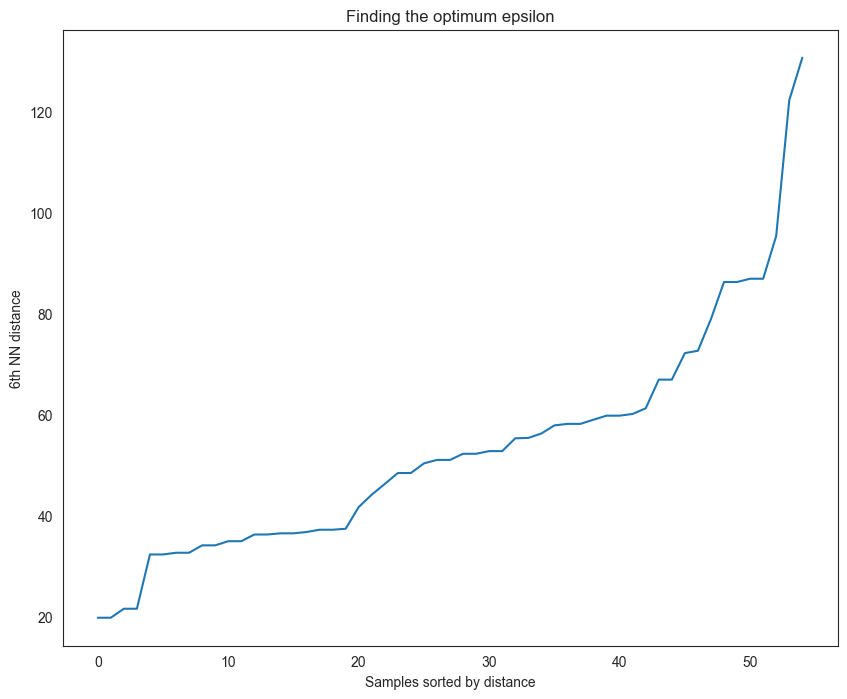

In [68]:
def OptimumEpsilonFinder (Data, n_nei):
    from sklearn.neighbors import NearestNeighbors
    Neighbors=NearestNeighbors(n_neighbors=n_nei)
    nbrs=Neighbors.fit(Data)
    distances, indices = nbrs.kneighbors(Data)
    fig=plt.figure(figsize=(10,8))
    distances=np.sort(distances, axis=0)
    distances=distances[:,1]
    plt.plot(distances)
    plt.title('Finding the optimum epsilon')
    plt.xlabel('Samples sorted by distance')
    plt.ylabel('6th NN distance')
    plt.show()
    return
OptimumEpsilonFinder (SAR.loc[0:142,'Pb':], 2)

DBSCAN Itself

4     -1
6     -1
18     0
20    -1
34     0
35    -1
38     0
39    -1
40    -1
41     0
42    -1
43     0
44     0
46     0
47     0
48     0
53     0
60     0
61     0
65     0
66     0
71     0
73     0
74     0
77     0
78     0
79     0
80     0
81     0
82    -1
83     0
84     0
85    -1
88     0
89     0
90     0
91     0
92     0
95    -1
96    -1
97    -1
98    -1
101    0
102    0
105    0
106   -1
107   -1
113    0
115    0
117    0
118    0
124    0
126    0
129    0
131    0
Name: clusters, dtype: int64


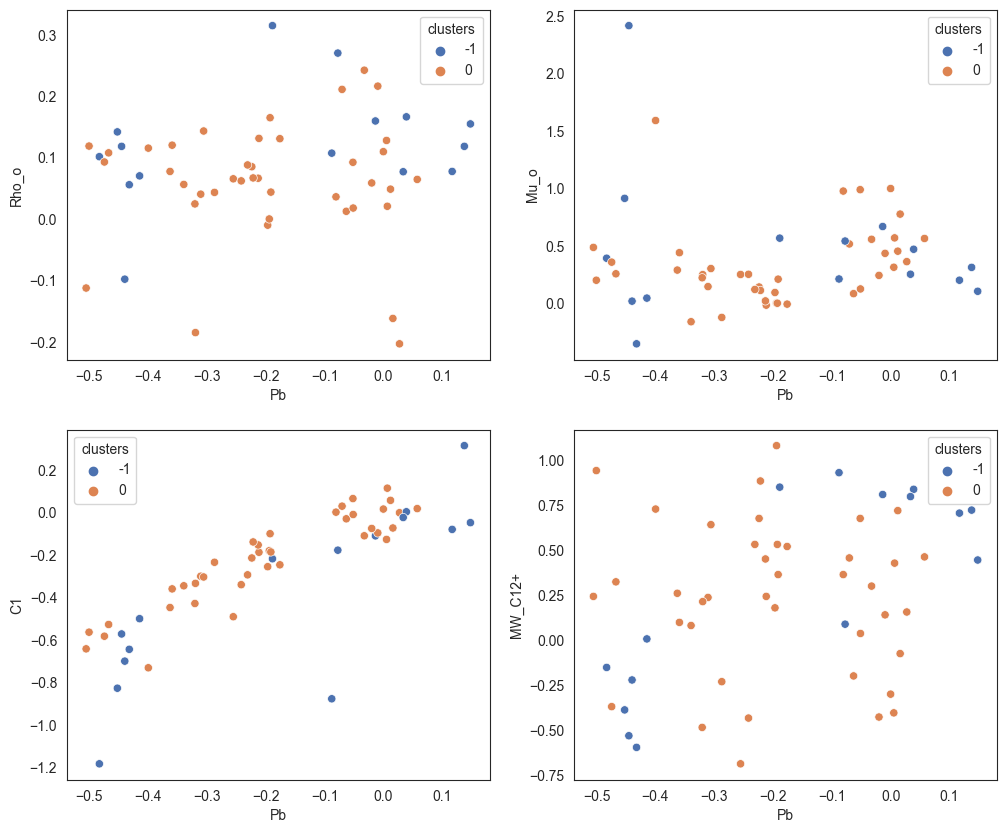

In [69]:
#COMP2 = std_data.loc[0:142,'Pb':]
#FAH2 = FAH_S.loc[0:142,'Pb':]
#ILM2 = ILM_S.loc[0:142,'Pb':]
SAR2 = SAR_S.loc[0:142,'Pb':]
#GAD2 = GAD_S.loc[0:142,'Pb':]
#KZH2 = KZH_S.loc[0:142,'Pb':]

def DBSCANN(Data, eps, min_sam):
    from sklearn.cluster import DBSCAN
    Clustering=DBSCAN(eps=eps ,min_samples=min_sam, metric='euclidean')
    DB=Clustering.fit_predict(Data)
    labels=pd.DataFrame(DB,columns=['clusters'])
    #FAH=pd.DataFrame(FAH,columns=data.columns[:])
    Data['clusters']=DB
    print(Data['clusters'])
    #data['clusters']=DB
    Group_by_mean=Data.groupby(by='clusters').mean()
    #print(Group_by_mean)
    
    plt.figure(figsize = (12, 10))
    ax1 = plt.subplot(2,2,1)
    sns.scatterplot(data=Data, x='Pb', y="Rho_o", hue = 'clusters', palette="deep")
    plt.xlabel('Pb')
    plt.ylabel('Rho_o')


    ax2 = plt.subplot(2,2,2)
    sns.scatterplot(data=Data, x='Pb', y="Mu_o", hue = 'clusters', palette="deep")
    plt.xlabel('Pb')
    plt.ylabel('Mu_o')

    ax3 = plt.subplot(2,2,3)
    sns.scatterplot(data=Data, x='Pb', y="C1", hue = 'clusters', palette="deep")
    plt.xlabel('Pb')
    plt.ylabel('C1')
    
    ax4 = plt.subplot(2,2,4)
    sns.scatterplot(data=Data, x='Pb', y="MW_C12+", hue = 'clusters', palette="deep")
    plt.xlabel('Pb')
    plt.ylabel('MW_C12+')
    plt.savefig('plot.png', dpi=300) 
    plt.show()    

    #sns.pairplot(FAH, hue = 'clusters')
    #plt.show()
    return

#DBSCANN(COMP2, 2, 6)
#DBSCANN(FAH2, 2, 6)
#DBSCANN(ILM2, 2, 6)
DBSCANN(SAR2, 2, 6)
#DBSCANN(GAD2, 2, 6)
#DBSCANN(KZH2, 2, 6)



LOF

4     -3.666549
6     -4.585005
18    -0.984175
20    -1.154859
34    -1.119279
35    -1.554315
38    -1.046810
39    -1.803054
40    -1.499730
41    -0.986992
42    -1.054963
43    -0.958118
44    -1.004946
46    -0.996178
47    -0.996189
48    -1.035908
53    -0.971130
60    -0.971591
61    -0.981110
65    -1.100231
66    -1.039121
71    -0.981362
73    -1.020955
74    -1.015715
77    -1.217802
78    -1.002573
79    -1.156868
80    -1.415668
81    -0.991176
82    -1.075387
83    -0.974639
84    -1.005946
85    -1.176199
88    -0.965550
89    -1.006736
90    -1.107766
91    -1.067631
92    -0.980006
95    -1.403296
96    -1.670738
97    -2.156653
98    -1.749086
101   -0.979530
102   -0.976914
105   -0.977447
106   -1.200506
107   -1.805254
113   -1.133691
115   -1.064033
117   -0.977166
118   -1.039100
124   -1.080202
126   -0.999497
129   -1.006852
131   -0.995660
Name: Scores, dtype: float64


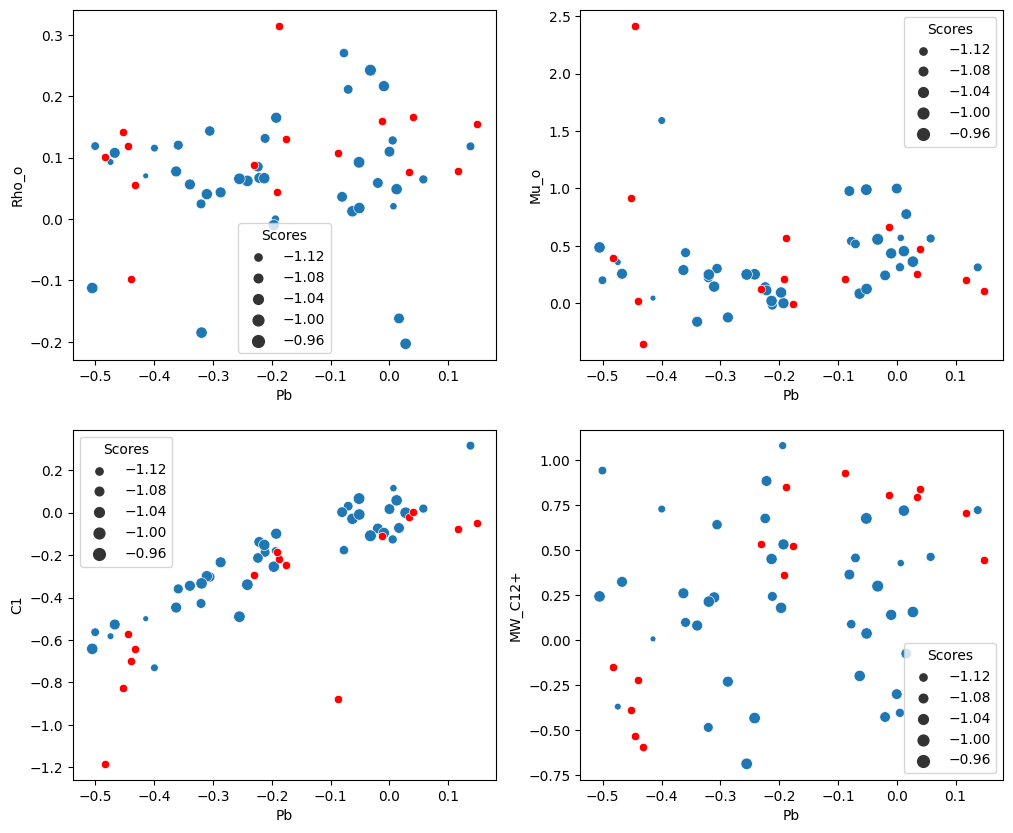

In [13]:
SAR3 = SAR_S.loc[0:142,'Pb':]
def LOF(Data, n_nei, con):
    from sklearn.neighbors import LocalOutlierFactor
    clf=LocalOutlierFactor(n_neighbors=n_nei, contamination=con,
                           metric='euclidean')
    hh= clf.fit(Data)
    Data['Scores']=clf.negative_outlier_factor_
    print(Data['Scores'])
    
    Data_Sorted = Data.sort_values(by=['Scores'])
    plt.figure(figsize = (12, 10))
    ax1 = plt.subplot(2,2,1)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="Rho_o", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="Rho_o", c = 'red', legend=False)
    plt.xlabel('Pb')
    plt.ylabel('Rho_o')


    ax2 = plt.subplot(2,2,2)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="Mu_o", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="Mu_o", c = 'red', legend=False)
    plt.xlabel('Pb')
    plt.ylabel('Mu_o')

    ax3 = plt.subplot(2,2,3)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="C1", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="C1", c = 'red', legend=False)
    plt.xlabel('Pb')
    plt.ylabel('C1')
    
    ax4 = plt.subplot(2,2,4)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="MW_C12+", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="MW_C12+", c = 'red', legend=False)
    plt.xlabel('Pb')
    plt.ylabel('MW_C12+')
    
    plt.savefig('plot.png', dpi=300) 
    plt.show()
    
    return
LOF(SAR3, 20, 'auto')

OCSVM

4       1.248657
6       1.222348
18     12.047844
20     10.072607
34      9.388722
35      6.309042
38     10.163521
39      4.846328
40      7.041362
41     12.014662
42     10.592178
43     11.101594
44     10.664286
46     11.465938
47     11.218293
48     10.887076
53     12.299179
60     12.631314
61     12.869007
65     11.292796
66     11.718994
71     12.873762
73     11.942971
74     12.629544
77     10.281044
78     12.061208
79     10.886491
80      8.214020
81     11.783801
82     10.770498
83     12.224411
84     10.991263
85     10.188686
88     12.433645
89     12.300744
90     10.827161
91     11.209990
92     11.639068
95      8.695331
96      6.533329
97      3.836551
98      6.116766
101    10.853016
102    10.886836
105    12.798252
106     8.377353
107     5.067136
113     9.887901
115    10.759166
117    12.827282
118    10.887413
124    10.535360
126    10.886836
129    11.107884
131    11.290379
Name: Scores, dtype: float64


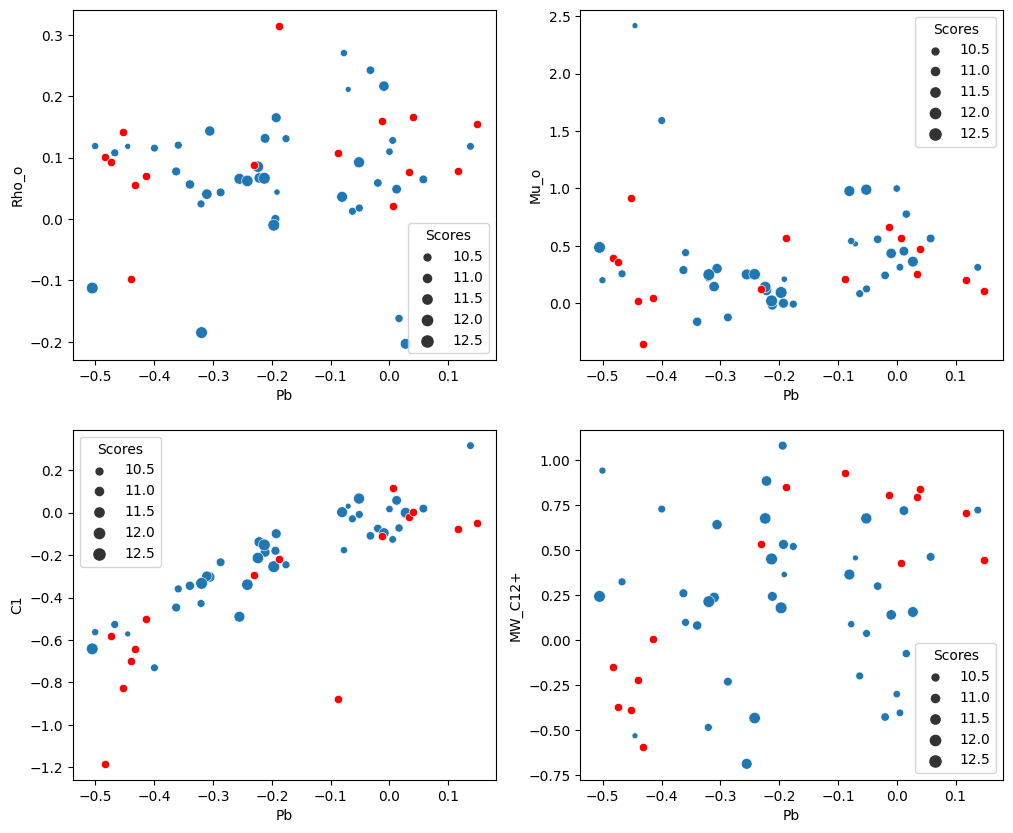

In [14]:
SAR4 = SAR_S.loc[0:142,'Pb':]
def OCSVM(Data, gamma):
    from sklearn.svm import OneClassSVM
    clf = OneClassSVM(gamma=gamma).fit(Data)
    clf.predict(Data)
    Data['Scores']=clf.score_samples(Data)
    print(Data['Scores'])

    
    Data_Sorted = Data.sort_values(by=['Scores'])
    plt.figure(figsize = (12, 10))
    ax1 = plt.subplot(2,2,1)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="Rho_o", size =  'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="Rho_o", c = 'red', legend=False)
    plt.xlabel('Pb')
    plt.ylabel('Rho_o')


    ax2 = plt.subplot(2,2,2)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="Mu_o", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="Mu_o", c = 'red', legend=False)
    plt.xlabel('Pb')
    plt.ylabel('Mu_o')

    ax3 = plt.subplot(2,2,3)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="C1", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="C1", c = 'red', legend=False)
    plt.xlabel('Pb')
    plt.ylabel('C1')
    
    ax4 = plt.subplot(2,2,4)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="MW_C12+", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="MW_C12+", c = 'red', legend=False)
    plt.xlabel('Pb')
    plt.ylabel('MW_C12+')
    
    plt.savefig('plot.png', dpi=300) 
    plt.show()
    return

OCSVM(SAR4, 'auto')

ABOD

4      0.000056
6      0.000004
18     0.016584
20     0.000901
34     0.001586
35     0.000133
38     0.003278
39     0.000027
40     0.001149
41     0.032674
42     0.002716
43     0.006950
44     0.006797
46     0.026242
47     0.020271
48     0.005086
53     0.013142
60     0.021132
61     0.031487
65     0.018437
66     0.015951
71     0.046030
73     0.021658
74     0.023372
77     0.017928
78     0.022405
79     0.025835
80     0.009281
81     0.007305
82     0.002014
83     0.043017
84     0.017009
85     0.001158
88     0.015547
89     0.027721
90     0.002843
91     0.005795
92     0.010970
95     0.015367
96     0.007164
97     0.000724
98     0.005031
101    0.007984
102    0.008667
105    0.020974
106    0.000968
107    0.000040
113    0.001296
115    0.002915
117    0.045989
118    0.005565
124    0.002396
126    0.008161
129    0.012947
131    0.009158
Name: Scores, dtype: float64


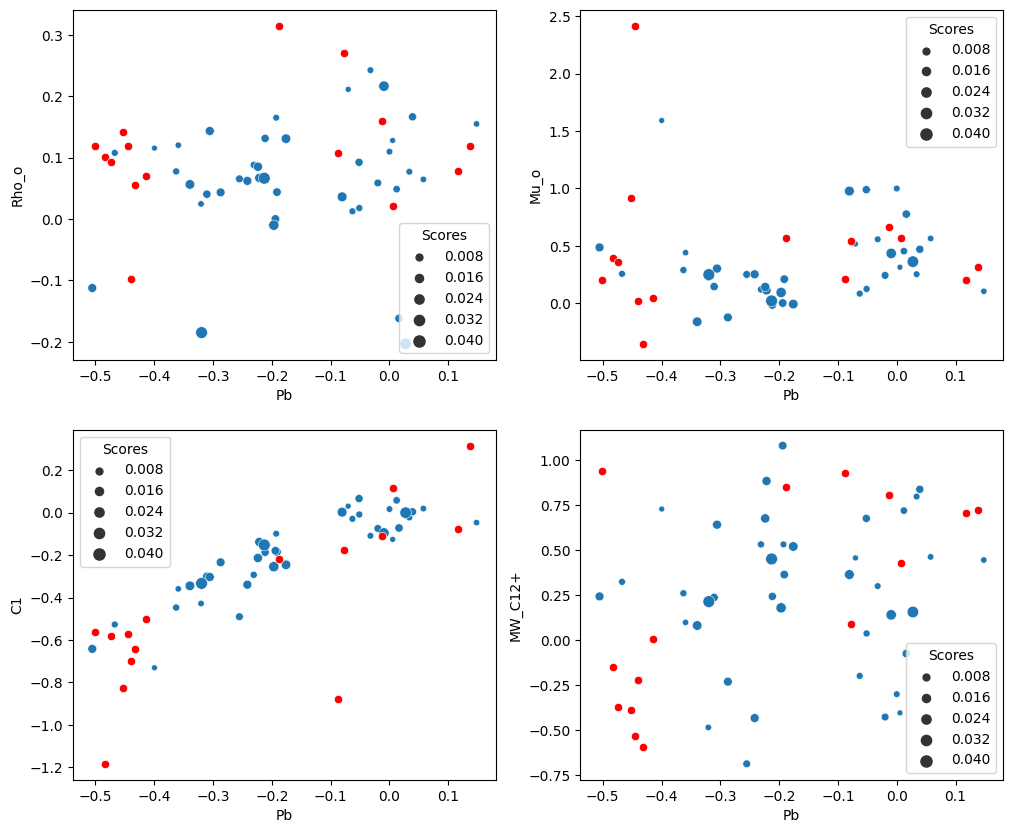

In [23]:
from pyod.models.abod import ABOD

SAR5 = SAR_S.loc[0:142,'Pb':]

def ABODme(Data, cont, n_neigh):
    abod_model = ABOD(contamination=cont, method='fast', n_neighbors=n_neigh)
    abod_model.fit(SAR5)
    Data['Scores'] = - abod_model.decision_scores_
    print(Data['Scores'])
    
    Data_Sorted = Data.sort_values(by=['Scores'])
    plt.figure(figsize = (12, 10))
    ax1 = plt.subplot(2,2,1)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="Rho_o", size =  'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="Rho_o", c = 'red', legend=False)
    plt.xlabel('Pb')
    plt.ylabel('Rho_o')


    ax2 = plt.subplot(2,2,2)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="Mu_o", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="Mu_o", c = 'red', legend=False)
    plt.xlabel('Pb')
    plt.ylabel('Mu_o')

    ax3 = plt.subplot(2,2,3)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="C1", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="C1", c = 'red', legend=False)
    plt.xlabel('Pb')
    plt.ylabel('C1')
    
    ax4 = plt.subplot(2,2,4)
    sns.scatterplot(data = Data_Sorted[15:], x='Pb', y="MW_C12+", size = 'Scores')
    sns.scatterplot(data = Data_Sorted[0:15], x='Pb', y="MW_C12+", c = 'red', legend=False)
    plt.xlabel('Pb')
    plt.ylabel('MW_C12+')
    
    plt.savefig('plot.png', dpi=300) 
    plt.show()
    return


ABODme(SAR5, 0.1, 10)